# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#añado esta nota para hacer la pull request del viernes jeje
# Your Code Here

In [3]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [4]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

In [5]:
fitbit.info()
fitbit.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

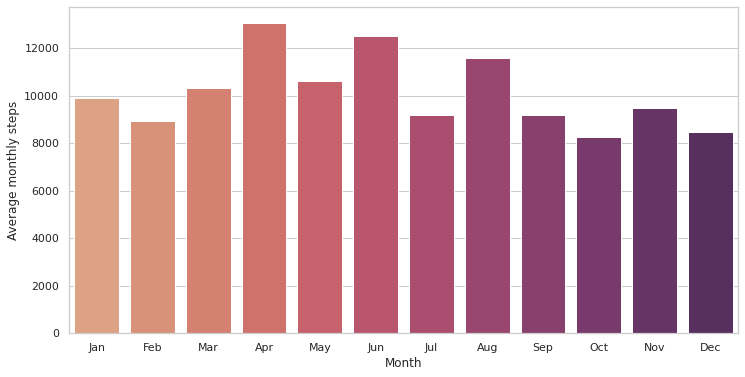

In [6]:
# AVERAGE STEPS BY MONTH_ENCODED

fitbit_t1 = pd.DataFrame(fitbit["Steps"].groupby(fitbit["Months_encoded"]).mean())
monthlist = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plot_1 = sns.barplot(x = monthlist , y = 'Steps',data = fitbit_t1, palette = "flare")
plot_1.set(xlabel='Month', ylabel='Average monthly steps')

plt.savefig('stepsmonth.png')

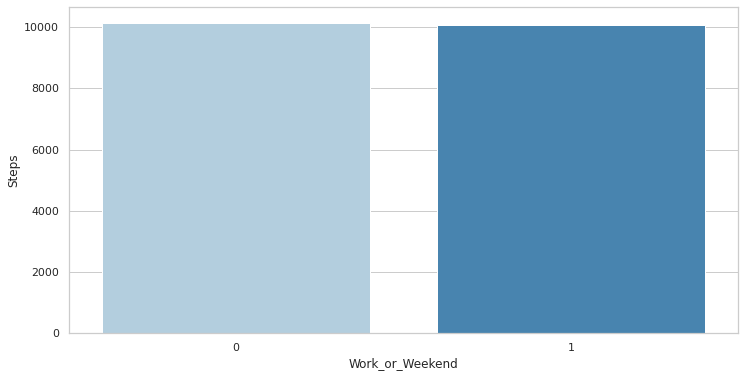

In [12]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbit_t2 = pd.DataFrame(fitbit["Steps"].groupby(fitbit["Work_or_Weekend"]).mean())
#Day_list = []
plot_2 = sns.barplot(x = fitbit['Work_or_Weekend'], y = 'Steps',data = fitbit_t2, palette = "Blues")
#the fitbiter is roughly as active on workdays and weekend
plt.savefig('Stepsworkweek.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

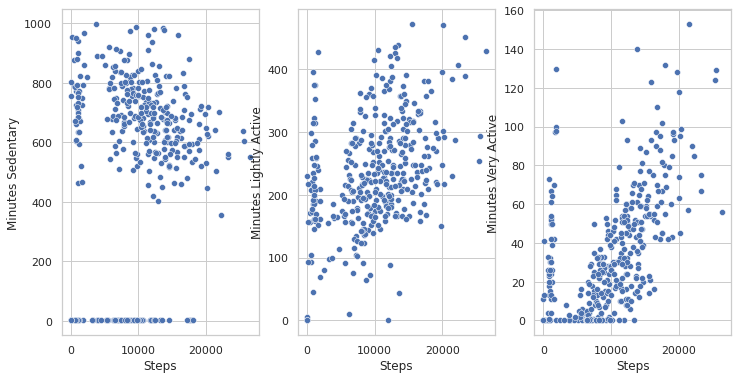

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
#sns.scatterplot(data = fitbit, x = fitbit.Steps, ax=axs[i])
activity_list = ["Minutes Sedentary", "Minutes Lightly Active", "Minutes Very Active"]

for i in range(0,3):
    sns.scatterplot(data = fitbit, x = fitbit.Steps, y=activity_list[i], ax=axs[i])
    #print(sns.scatterplot(x="Steps", y= i, data=fitbit));
    
plt.savefig('Scatterloop.png')
    
#For some reason I just manage to plot 3 scatter plot each one on top of the other, which
#I guess is not what it is asked here

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [9]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [10]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
titanic.select_dtypes( include=["float","int"]).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [14]:
# CATEGORICAL VARIABLES
titanic.select_dtypes( include="object").head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [17]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize": (12.,6.)})
#To my best knowledge there is not a "classic" style for seaborn so I chose "Whitegrid"

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

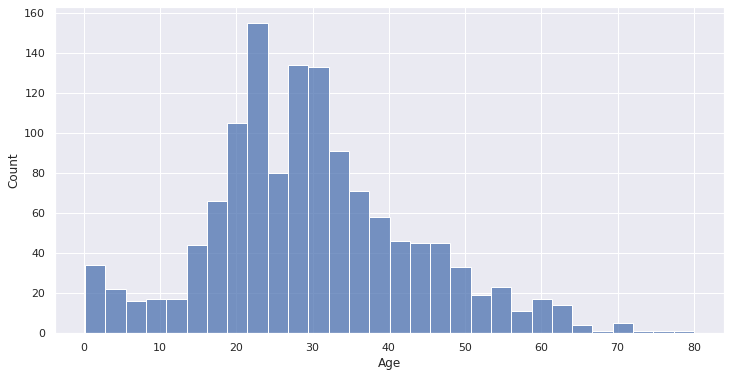

In [24]:
sns.histplot(data = "titanic", x = titanic.Age)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

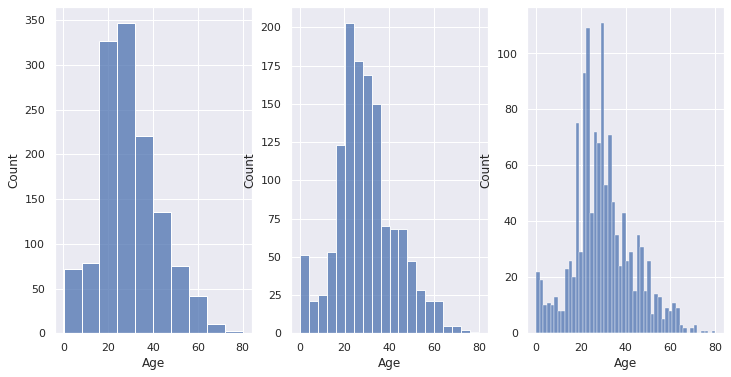

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

# 10
sns.histplot(data = "titanic", x = titanic.Age, bins=10, ax=axs[0])
#axs[0].set_title(bulbasaur.name)

# 20
sns.histplot(data = "titanic", x = titanic.Age, bins=20, ax=axs[1])
#axs[1].set_title(charmander.name)

# 50
sns.histplot(data = "titanic", x = titanic.Age, bins =50, ax=axs[2])
#axs[2].set_title(squirtle.name)

#### How does the bin size affect your plot?

In [ ]:
#The size doe not necessarily changes, but the more biens there are, the more granularity can
#be appreciated within the data distribution thoough it remains the same

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
#If I'm not getting the question wrong the are asking for the same they asked above but with seaborn
#which I already used, so I will just post the same solution.

sns.histplot(data = "titanic", x = titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

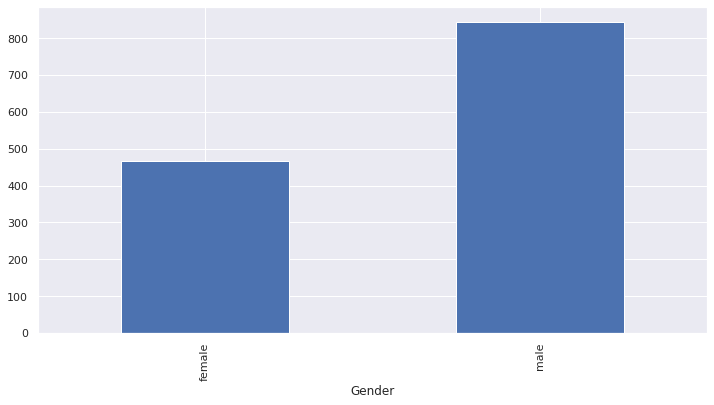

In [48]:
# Method 1 - matplotlib
titanic.groupby(["Gender"])["Gender"].count().plot(kind="bar");

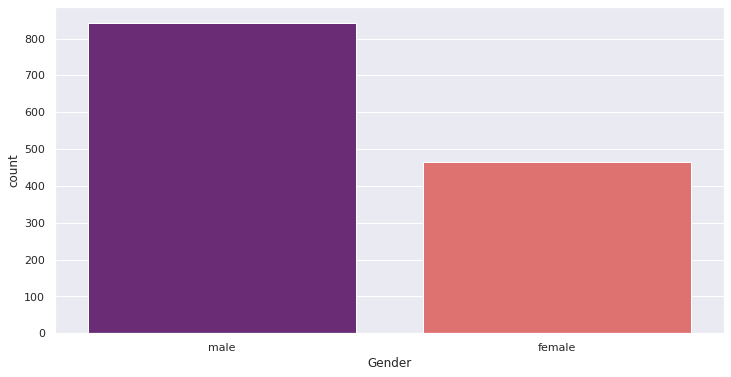

In [51]:
# Method 2 - seaborn
sns.countplot(x="Gender", data=titanic, palette="magma");

#### Use the right plot to visualize the column `Pclass`.

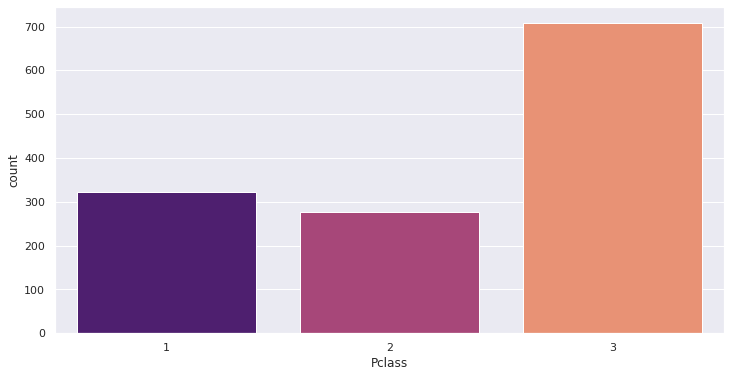

In [52]:
sns.countplot(x="Pclass", data=titanic, palette="magma");

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

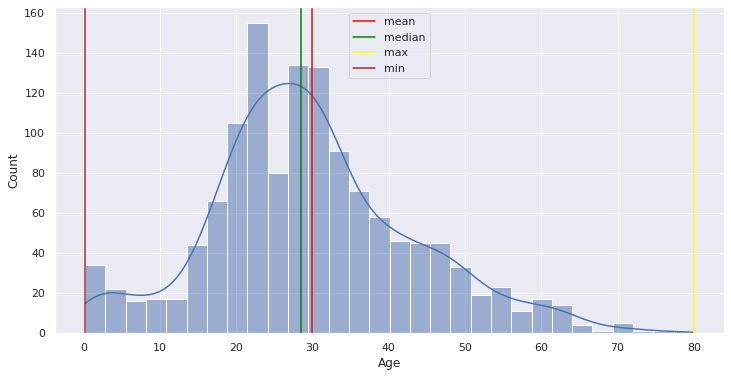

In [62]:
graf = sns.histplot(x=titanic.Age, kde=True) 
graf.axvline(x=titanic.Age.mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.median(), c="green", label="median")
graf.axvline(x=titanic.Age.max(), c="yellow", label="max")
graf.axvline(x=titanic.Age.min(), c="brown", label="min")
plt.legend()

In [ ]:
#The graph in the displayed above contains the most relevant information in regards
#to measures of central tendency, with histogram, density function line
#and the mean and median depicted too.
#There is no need to show the mode in a third line as the mode is simply captured
#by the highest bar in the histogram
#I decided to include max and min as separate lines although they are redundant 
#as that can clearly be seen by just looking at the histogram

#### What does the last plot tell you about the feature `Age`?

In [ ]:
#A relationship of median<mean suggests that the data is left skewed, in other words there is a higher
#number of individuals for each of the bins in the "lower end" of the distribution (young people)
#while for theupper tail the individuals are more dispersed accross age groups.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [58]:
titanic["Age"].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
#I believe I answered the question about distribution in the previous head, se here i included a table with the
#summary statistics which to my understanding is what was asked in the previous question.
#The conclussions to extract from each of them is fairly similar

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

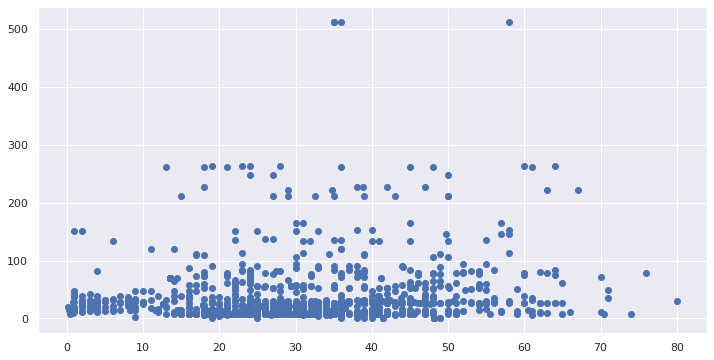

In [63]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Age, y=titanic.Fare)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

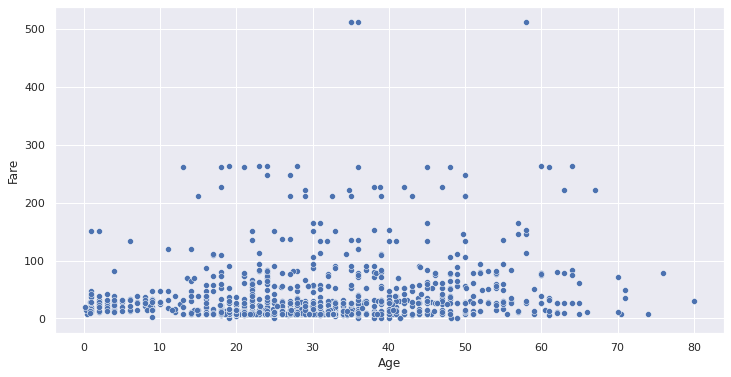

In [64]:
# Method 2 - seaborn
sns.scatterplot(x="Age", y="Fare", data=titanic)

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

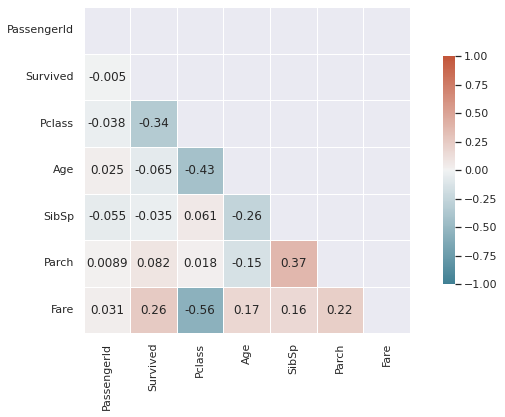

In [71]:
corr=titanic.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .7
                     },# barra lateral
           annot=True)

#### What are the most correlated features?

In [ ]:
#Pclass and fare are the most correlated features, pretty unsuprisingly displaying a negative correlation
#as higher fares implies higher class (by definition) and a higher classes are labeled with a lower ordinal number
#(e.g. the first class is the highest).
#Other highlighted correlations are the pairs Parch-Sibsp and Pclass-Age

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

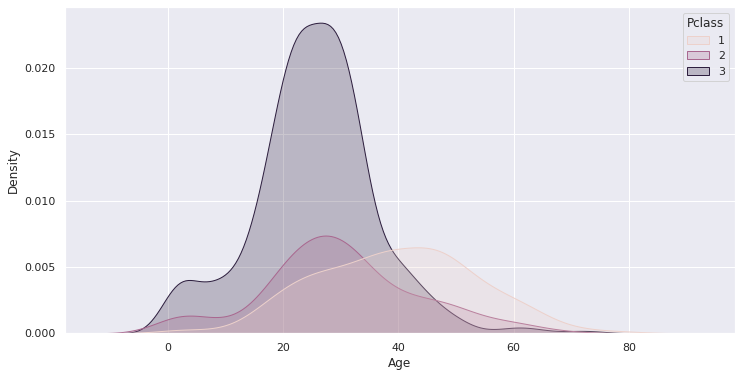

In [76]:
graf_2 = sns.kdeplot(x=titanic.Age, hue=titanic.Pclass, fill=True);
#Though the summary statistics are not made explicit, (i.e. the number is not shown)
#these can be inferred from the desity distribution depicted


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [87]:
facetgrid = sns.FacetGrid(titanic, cold="Gender")
facetgrid.map(plt.histplot, titanic["Gender"], titanic["Age"])
print(facetgrid)

#No conseguí hacer funcionar el facetgrid :(

TypeError: __init__() got an unexpected keyword argument 'cold'